<a href="https://colab.research.google.com/github/Gimesszabi13/solowork/blob/main/stockmovement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [49]:
user_input = input("Enter a stock ticker (e.g., VTI) or press Enter to use the default stocks: ")
#only enter a stock ticker if u want to see the data for only that stock!!!, you can enter one from the default tickers dataframe to see it indvidually
if user_input:
    tickers = [user_input.upper()]
    print(f"\nUsing the ticker: {tickers[0]}")
else:
    tickers = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA', 'NVDA', 'META', 'JPM']
    print(f"\nNo ticker entered. Using default stocks: {', '.join(tickers)}")

Enter a stock ticker (e.g., VTI) or press Enter to use the default stocks: GOOG

Using the ticker: GOOG


In [50]:
end_date = '2025-01-01'

In [51]:
print(f"\nFetching data for the following stocks: {tickers} from {start_date} to {end_date}.")


Fetching data for the following stocks: ['GOOG'] from 2020-01-01 to 2025-01-01.


In [52]:
try:
    data = yf.download(tickers, start=start_date, end=end_date)
    print("\nData fetched successfully!")
except Exception as e:
    print(f"\nAn error occurred while fetching data: {e}")
    exit()

/tmp/ipython-input-1051263743.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Data fetched successfully!


In [53]:
if data.empty:
    print("\nError: The downloaded DataFrame is empty. Please check your internet connection or the ticker symbols.")
    # The data frame came back empty due to a silly coding error so I had to do a double check
    exit()

In [54]:
adj_close_data = data['Close']

daily_returns = adj_close_data.pct_change()

print("\nDaily returns calculated. Here are the first 5 rows:")
print(daily_returns.head())


Daily returns calculated. Here are the first 5 rows:
Ticker          GOOG
Date                
2020-01-02       NaN
2020-01-03 -0.004907
2020-01-06  0.024657
2020-01-07 -0.000624
2020-01-08  0.007880


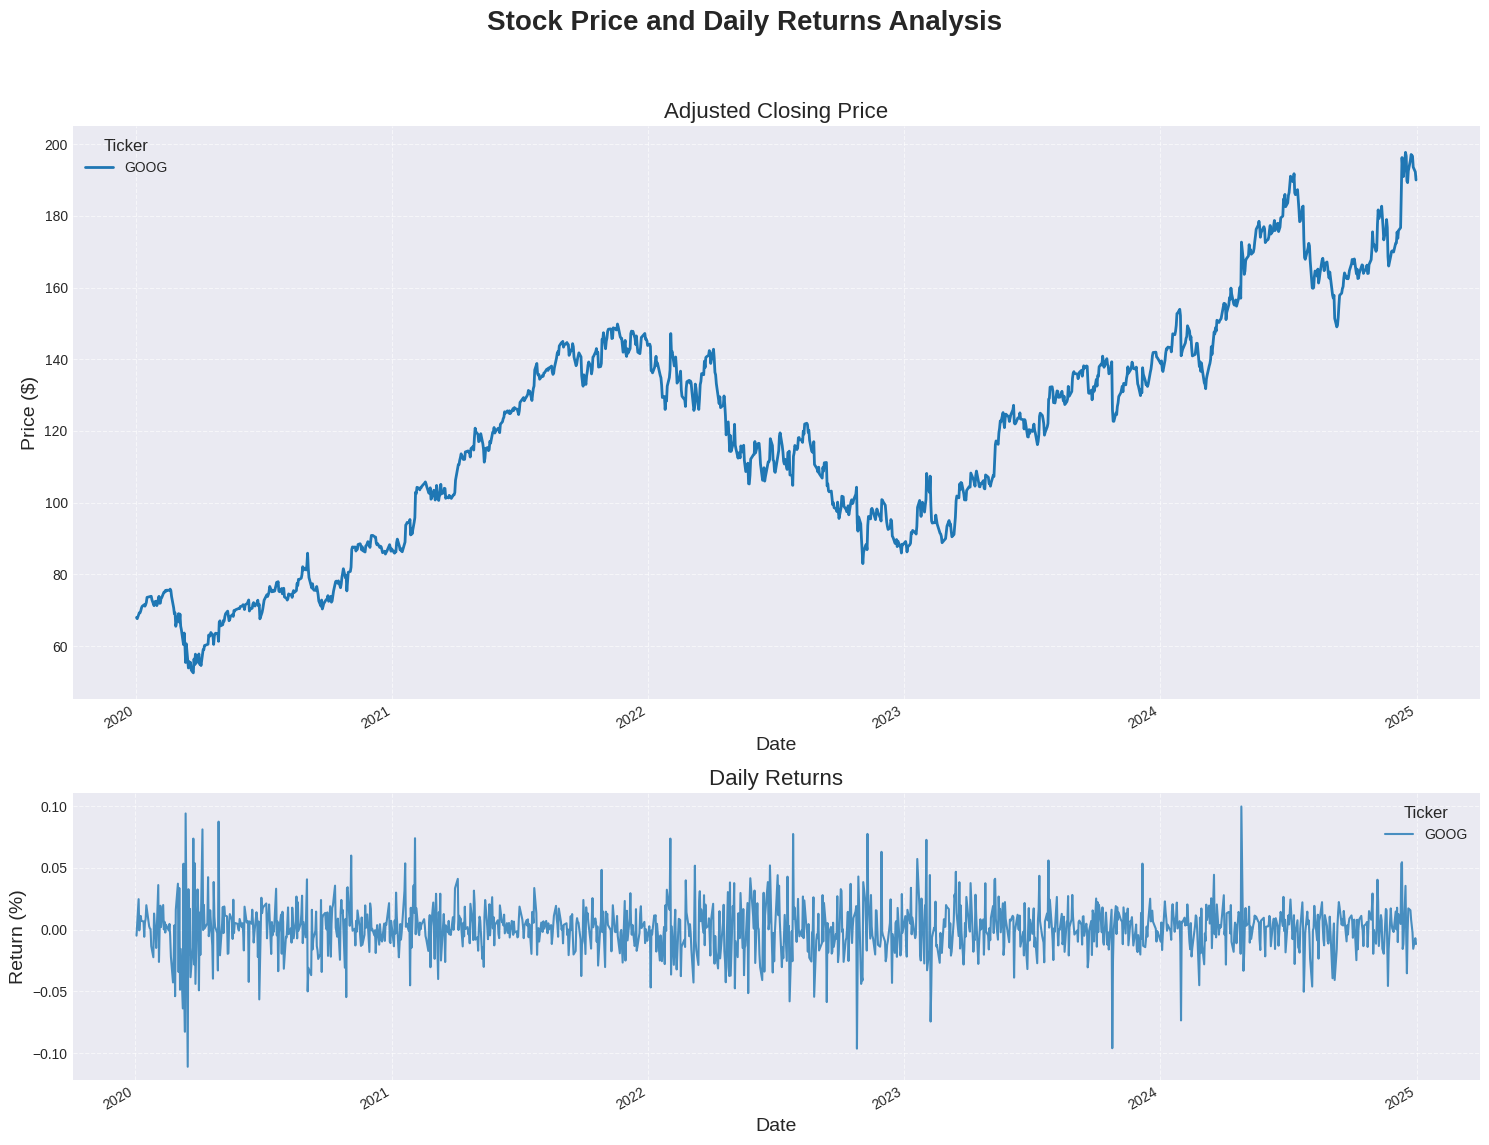

In [55]:
plt.style.use('seaborn-v0_8-darkgrid')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12), gridspec_kw={'height_ratios': [2, 1]})
fig.suptitle('Stock Price and Daily Returns Analysis', fontsize=20, weight='bold')

adj_close_data.plot(ax=ax1, linewidth=2)
ax1.set_title('Adjusted Closing Price', fontsize=16)
ax1.set_ylabel('Price ($)', fontsize=14)
ax1.set_xlabel('Date', fontsize=14)
ax1.legend(title='Ticker', fontsize=10, title_fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.6)

daily_returns.plot(ax=ax2, linewidth=1.5, alpha=0.8)
ax2.set_title('Daily Returns', fontsize=16)
ax2.set_ylabel('Return (%)', fontsize=14)
ax2.set_xlabel('Date', fontsize=14)
ax2.legend(title='Ticker', fontsize=10, title_fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [48]:
plot_filename = 'stock_analysis_plot.png'
fig.savefig(plot_filename)
print(f"\nPlots generated and saved as '{plot_filename}' successfully!")

plt.show()

output_filename = 'daily_stock_returns.csv'
daily_returns.to_csv(output_filename)

print(f"\nDaily returns data saved to '{output_filename}' successfully!")


Plots generated and saved as 'stock_analysis_plot.png' successfully!

Daily returns data saved to 'daily_stock_returns.csv' successfully!
